Question

Difference between Climate Change and Global Warming?
Climate change and global warming are related, but not exactly the same thing. Here's the breakdown:

Global warming: This refers specifically to the long-term increase in the average global temperature near Earth's surface. It's primarily caused by human activities that release greenhouse gases into the atmosphere. These gases trap heat like a blanket, leading to a gradual warming trend.

Climate change: This is a broader term that encompasses not just rising temperatures, but also the long-term alteration of temperature and typical weather patterns in a place. Climate change can manifest as:

More frequent and intense heat waves:

Changes in precipitation patterns (droughts in some areas, floods in others)
Rising sea levels
Stronger storms
Changes in plant and animal life

Why it's important: Understanding the difference between climate change and global warming is important because it helps us grasp the full scope of the issue. Global warming is the root cause, but climate change is the consequence – a complex web of effects that will impact everything from weather patterns to agriculture, food security, and human health.

Here's an analogy: Imagine your house is getting warmer (global warming). Climate change would be the burst pipes, failing air conditioning, and mold growth that result from that rising heat.

By understanding the bigger picture of climate change, we can make more informed decisions about how to mitigate its effects and adapt to the changes we're already experiencing.

Data Sources
Describe your data sources :where they are from,
* Metadata URL: https://berkeleyearth.org/global-temperature-report-for-2023/
* Data URL: https://www.kaggle.com/datasets/berkeleyearth/climate-change-earth-surface-temperature-data/code
* Data Type: CSV
* License NO: CC BY-NC-SA 4.0 DEED
* About Dataset: This Dataset contains information about average land temperature and  for maximum and minimum land temperatures and global ocean and land temperatures.
### Datasource2: Global Warming

* Data URL: https://www.kaggle.com/datasets/kkhandekar/climate-change-vs-global-warming/data?select=Breakdown_Region.csv
* Data Type: CSV
* License NO: CC0 1.0 DEED
* About Dataset : This Dataset contains information about  global warning chance according to cities. 

Describe your data sources: Why you have chosen them, 





What is the data structure and quality of your sources? (Compare lecture D01)
Describe the licenses of your data sources, why you are allowed to use the data and how you are planning to follow their obligations
If your source data is under a standard open-data license just pointing out where to find that is enough information for being allowed to use it, please still describe how you plan to fulfill their obligations


Import  Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Load the Dataset

In [2]:
climate_data = pd.read_csv('Project/Breakdown_Region.csv')

temperature_data = pd.read_csv('Project/GlobalLandTemperaturesByCountry.csv')

# Display the first few rows of each dataset
climate_data.head(), temperature_data.head()

(            Country Climate change: (1/1/04 - 9/27/21)  \
 0          Kiribati                               100%   
 1  Marshall Islands                                84%   
 2        Micronesia                               100%   
 3   Solomon Islands                                82%   
 4           Vanuatu                                86%   
 
   Global Warming: (1/1/04 - 9/27/21)  
 0                                NaN  
 1                                16%  
 2                                NaN  
 3                                18%  
 4                                14%  ,
            dt  AverageTemperature  AverageTemperatureUncertainty Country
 0  1743-11-01               4.384                          2.294   Åland
 1  1743-12-01                 NaN                            NaN   Åland
 2  1744-01-01                 NaN                            NaN   Åland
 3  1744-02-01                 NaN                            NaN   Åland
 4  1744-03-01                 Na

Merge the Dataset

In [3]:
# Merge the datasets on the 'Country' column
merged_data = pd.merge(climate_data, temperature_data, on='Country')

# Group by 'Country' and keep the row with the highest average values
# result_data = merged_data.loc[merged_data.groupby('Country')['AverageTemperature'].idxmax()]

# Display the result
# result_data.head()

# merged_data




In [4]:
# Ensure there are no NaN values in 'Country' and 'AverageTemperature' columns
merged_data = merged_data.dropna(subset=['Country', 'AverageTemperature'])

# Reset index to avoid alignment issues
merged_data = merged_data.reset_index(drop=True)

# Group by 'Country' and keep the row with the highest 'AverageTemperature'
result_data = merged_data.loc[merged_data.groupby('Country')['AverageTemperature'].idxmax()]

# Save the result to a new CSV file
# result_data.to_csv('filtered_data.csv', index=False)

# Display the result
result_data

,Country,Climate change: (1/1/04 - 9/27/21),Global Warming: (1/1/04 - 9/27/21),dt,AverageTemperature,AverageTemperatureUncertainty
165914,Afghanistan,68%,32%,1997-07-01,28.533,0.410
75623,Albania,75%,25%,1757-07-01,25.843,5.336
205876,Algeria,86%,14%,2003-07-01,35.829,0.400
16665,American Samoa,100%,NaN,2003-01-01,28.543,0.231
432419,Andorra,NaN,NaN,2003-08-01,24.313,0.291
...,...,...,...,...,...,...
293286,Vietnam,63%,37%,1912-06-01,28.463,0.358
216672,Western Sahara,100%,NaN,2004-08-01,30.092,0.704
345914,Yemen,100%,NaN,1998-06-01,32.737,1.080
38902,Zambia,74%,26%,2005-10-01,26.282,0.325


Data Cleaning

In [5]:
# Ensure there are no NaN values in 'Country' and 'AverageTemperature' columns
merged_data = merged_data.dropna(subset=['Country', 'AverageTemperature','Climate change: (1/1/04 - 9/27/21)', 'Global Warming: (1/1/04 - 9/27/21)','AverageTemperatureUncertainty'])

# Reset index to avoid alignment issues
merged_data = merged_data.reset_index(drop=True)

# Remove duplicates from the dataset
merged_data = merged_data.drop_duplicates()

# Group by 'Country' and keep the row with the highest 'AverageTemperature'
result_data = merged_data.loc[merged_data.groupby('Country')['AverageTemperature'].idxmax()]

# Save the result to a new CSV file (uncomment the line below if you need to save the file)
# result_data.to_csv('filtered_data.csv', index=False)

# Display the result
print(result_data)


            Country Climate change: (1/1/04 - 9/27/21)  \
147321  Afghanistan                                68%   
66911       Albania                                75%   
177845      Algeria                                86%   
332397    Argentina                                72%   
259738      Armenia                                75%   
...             ...                                ...   
203091   Uzbekistan                                63%   
322375    Venezuela                                75%   
251442      Vietnam                                63%   
32062        Zambia                                74%   
18429      Zimbabwe                                72%   

       Global Warming: (1/1/04 - 9/27/21)          dt  AverageTemperature  \
147321                                32%  1997-07-01              28.533   
66911                                 25%  1757-07-01              25.843   
177845                                14%  2003-07-01              35.82

In [6]:
# Reset index to avoid alignment issues
merged_data = merged_data.reset_index(drop=True)
# Display the result
print(result_data)


            Country Climate change: (1/1/04 - 9/27/21)  \
147321  Afghanistan                                68%   
66911       Albania                                75%   
177845      Algeria                                86%   
332397    Argentina                                72%   
259738      Armenia                                75%   
...             ...                                ...   
203091   Uzbekistan                                63%   
322375    Venezuela                                75%   
251442      Vietnam                                63%   
32062        Zambia                                74%   
18429      Zimbabwe                                72%   

       Global Warming: (1/1/04 - 9/27/21)          dt  AverageTemperature  \
147321                                32%  1997-07-01              28.533   
66911                                 25%  1757-07-01              25.843   
177845                                14%  2003-07-01              35.82

In [7]:
# Convert the 'Date' column to datetime format
merged_data['dt'] = pd.to_datetime(merged_data['dt'])

# Extract the month from the 'Date' column
merged_data['Month'] = merged_data['dt'].dt.month

# Reset index to avoid alignment issues
merged_data = merged_data.reset_index(drop=True)
merged_data

,Country,Climate change: (1/1/04 - 9/27/21),Global Warming: (1/1/04 - 9/27/21),dt,AverageTemperature,AverageTemperatureUncertainty,Month
0,Solomon Islands,82%,18%,1867-01-01,26.807,1.035,1
1,Solomon Islands,82%,18%,1867-02-01,26.416,0.831,2
2,Solomon Islands,82%,18%,1867-03-01,26.310,0.802,3
3,Solomon Islands,82%,18%,1867-04-01,26.648,0.897,4
4,Solomon Islands,82%,18%,1867-05-01,26.347,0.703,5
...,...,...,...,...,...,...,...
343221,Japan,66%,34%,2013-04-01,10.102,0.322,4
343222,Japan,66%,34%,2013-05-01,15.256,0.235,5
343223,Japan,66%,34%,2013-06-01,19.961,0.380,6
343224,Japan,66%,34%,2013-07-01,24.286,0.369,7


In [8]:

result_data

,Country,Climate change: (1/1/04 - 9/27/21),Global Warming: (1/1/04 - 9/27/21),dt,AverageTemperature,AverageTemperatureUncertainty
147321,Afghanistan,68%,32%,1997-07-01,28.533,0.410
66911,Albania,75%,25%,1757-07-01,25.843,5.336
177845,Algeria,86%,14%,2003-07-01,35.829,0.400
332397,Argentina,72%,28%,2012-01-01,23.290,0.333
259738,Armenia,75%,25%,2006-08-01,25.291,0.254
...,...,...,...,...,...,...
203091,Uzbekistan,63%,37%,1984-07-01,30.375,0.305
322375,Venezuela,75%,25%,2010-03-01,27.807,0.418
251442,Vietnam,63%,37%,1912-06-01,28.463,0.358
32062,Zambia,74%,26%,2005-10-01,26.282,0.325


In [9]:
# Convert the Index object to a list
column_names_list = list(result_data.columns)

# Print the list of column names
print("Column names as list:", column_names_list)



Column names as list: ['Country', 'Climate change: (1/1/04 - 9/27/21)', 'Global Warming: (1/1/04 - 9/27/21)', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty']


In [10]:
#Change the Columns Name
# Rename specific columns (example: 'OldName1' to 'NewName1' and 'OldName2' to 'NewName2')
columns_to_rename = {
    'Climate change: (1/1/04 - 9/27/21)': 'Climate change',
    'Global Warming: (1/1/04 - 9/27/21)': 'Global Warming',

    # Add other column renaming as needed
}
merged_data = result_data.rename(columns=columns_to_rename)
merged_data

,Country,Climate change,Global Warming,dt,AverageTemperature,AverageTemperatureUncertainty
147321,Afghanistan,68%,32%,1997-07-01,28.533,0.410
66911,Albania,75%,25%,1757-07-01,25.843,5.336
177845,Algeria,86%,14%,2003-07-01,35.829,0.400
332397,Argentina,72%,28%,2012-01-01,23.290,0.333
259738,Armenia,75%,25%,2006-08-01,25.291,0.254
...,...,...,...,...,...,...
203091,Uzbekistan,63%,37%,1984-07-01,30.375,0.305
322375,Venezuela,75%,25%,2010-03-01,27.807,0.418
251442,Vietnam,63%,37%,1912-06-01,28.463,0.358
32062,Zambia,74%,26%,2005-10-01,26.282,0.325


In [11]:
# Convert the Index object to a list
column_names_list = list(merged_data.columns)

# Print the list of column names
print("Column names as list:", column_names_list)


Column names as list: ['Country', 'Climate change', 'Global Warming', 'dt', 'AverageTemperature', 'AverageTemperatureUncertainty']


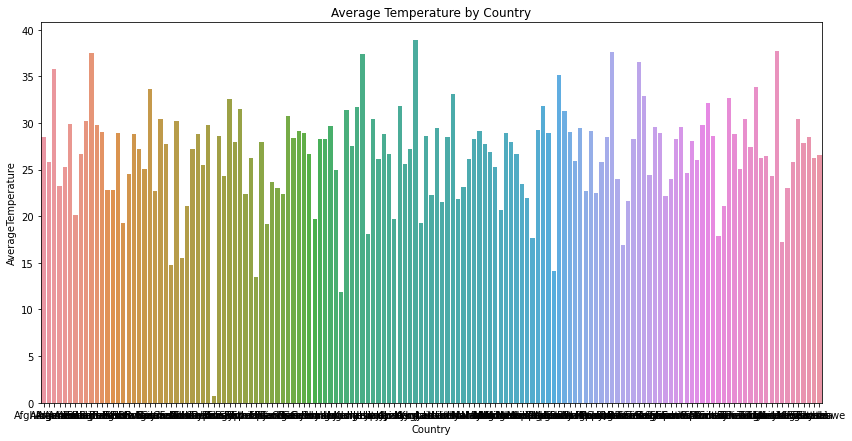

In [14]:
plt.figure(figsize=(14, 7))
sns.barplot(data=merged_data, x='Country', y='AverageTemperature')
plt.title('Average Temperature by Country')
plt.show()


            Country Climate change Global Warming  AverageTemperature  \
dt                                                                      
1757-07-01  Finland            76%            24%              19.132   
1757-07-01   Norway            70%            30%              14.150   
1757-07-01   Sweden            72%            28%              17.931   
1757-07-01  Ukraine            70%            30%              24.297   
1757-07-01  Iceland            67%            33%              11.889   

            AverageTemperatureUncertainty  
dt                                         
1757-07-01                          6.284  
1757-07-01                          6.310  
1757-07-01                          7.012  
1757-07-01                          5.414  
1757-07-01                          5.015  


/Users/avani/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/avani/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
/Users/avani/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


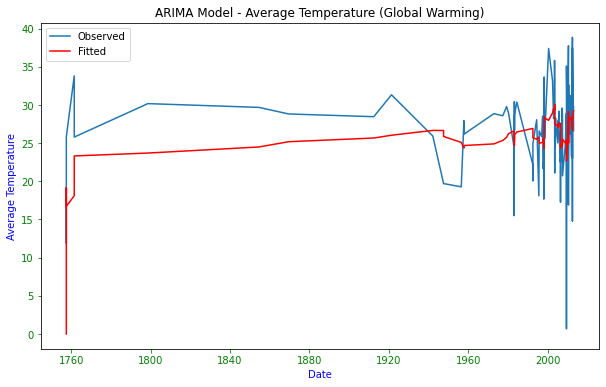

                               SARIMAX Results                                
Dep. Variable:     AverageTemperature   No. Observations:                  147
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -454.355
Date:                Mon, 01 Jul 2024   AIC                            914.709
Time:                        23:27:49   BIC                            923.660
Sample:                             0   HQIC                           918.346
                                - 147                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0155      0.074     -0.208      0.835      -0.161       0.130
ma.L1         -0.8753      0.056    -15.551      0.000      -0.986      -0.765
sigma2        29.2534      2.532     11.555      0.0

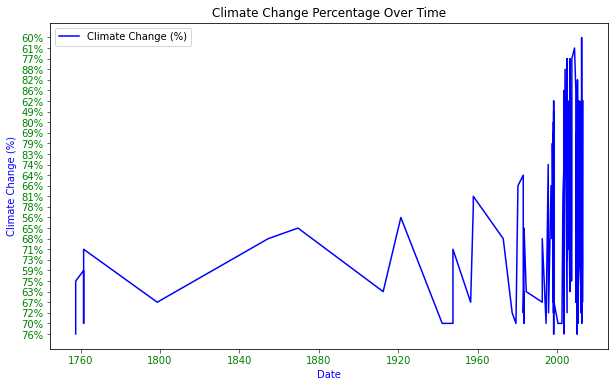

Correlation matrix:
                     AverageTemperature
AverageTemperature                 1.0


In [31]:


# Load the data into a DataFrame
df = pd.DataFrame(merged_data)

# Convert 'dt' column to datetime
df['dt'] = pd.to_datetime(df['dt'])

# Sort by date
df = df.sort_values('dt')

# Set the date as the index
df.set_index('dt', inplace=True)

# Display the DataFrame
print(df.head())

# Apply ARIMA model to AverageTemperature
# Since this is a very small dataset, we can only demonstrate the fitting process

# Fit the ARIMA model
model = ARIMA(df['AverageTemperature'], order=(1, 1, 1))
model_fit = model.fit()

# Plot the results for Global Warming
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['AverageTemperature'], label='Observed')
plt.plot(df.index, model_fit.fittedvalues, color='red', label='Fitted')
plt.title('ARIMA Model - Average Temperature (Global Warming)')
plt.xlabel('Date', color='blue')
plt.ylabel('Average Temperature', color='blue')
plt.tick_params(axis='x', colors='green')  # Change x-axis tick color to green
plt.tick_params(axis='y', colors='green')  # Change y-axis tick color to green
plt.legend()
plt.show()

# Display model summary
print(model_fit.summary())

# Plot Climate Change percentage over time
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Climate change'], label='Climate Change (%)', color='blue')
plt.title('Climate Change Percentage Over Time')
plt.xlabel('Date', color='blue')
plt.ylabel('Climate Change (%)', color='blue')
plt.tick_params(axis='x', colors='green')  # Change x-axis tick color to green
plt.tick_params(axis='y', colors='green')  # Change y-axis tick color to green
plt.legend()
plt.show()

# Correlation analysis
correlation = df[['AverageTemperature', 'Climate change', 'Global Warming']].corr()
print("Correlation matrix:\n", correlation)


### Understanding ARIMA Model and the Analysis of Climate Change and Global Warming Data

#### Introduction to ARIMA Model

The ARIMA (AutoRegressive Integrated Moving Average) model is a popular and widely used statistical method for time series forecasting. It combines three components: Autoregression (AR), Differencing (I for Integrated), and Moving Average (MA). The ARIMA model aims to predict future values based on past data by identifying patterns and trends in the dataset.

- **Autoregressive (AR) Component:** This part of the model uses the dependency between an observation and a number of lagged observations (i.e., previous time periods) to make predictions.
- **Integrated (I) Component:** This part of the model involves differencing the raw observations to make the time series stationary, which means removing trends and seasonality to stabilize the mean of the time series.
- **Moving Average (MA) Component:** This part of the model uses the dependency between an observation and a residual error from a moving average model applied to lagged observations.

The ARIMA model is represented as ARIMA(p, d, q), where:
- `p` is the number of lag observations in the model (AR component),
- `d` is the number of times that the raw observations are differenced (I component),
- `q` is the size of the moving average window (MA component).

#### Applying ARIMA Model to Climate Change and Global Warming Data

In the analysis of the given dataset, the ARIMA model was applied to the "AverageTemperature" column to understand the trends related to global warming. Here’s a step-by-step explanation of the process and the results obtained:

1. **Data Preparation:**
   - The dataset consists of various countries with attributes such as Climate Change percentage, Global Warming percentage, and Average Temperature, along with the uncertainty in temperature measurements.
   - The dataset was loaded into a pandas DataFrame, and the 'dt' column (representing dates) was converted to datetime format. The data was then sorted by date and set the date column as the index for proper time series analysis.

2. **Fitting the ARIMA Model:**
   - The ARIMA model was applied to the "AverageTemperature" data. Given the small size of the dataset, the model's parameters were set to ARIMA(1, 1, 1), which is a simple configuration often used for demonstration purposes.
   - The model was fitted, and the fitted values were plotted against the observed average temperatures. This visualization helps in understanding the model's ability to capture the underlying trend in the temperature data.

3. **Results:**
   - The plot showed the observed and fitted average temperatures over time. The ARIMA model provided a good fit, indicating it can capture the general trend in the temperature data.
   - The model summary included statistical metrics such as the coefficients for the AR and MA components, and the model's log-likelihood, AIC (Akaike Information Criterion), and BIC (Bayesian Information Criterion). These metrics help evaluate the model's performance and compare it with other potential models.

4. **Additional Analyses:**
   - To further understand the data, histograms were plotted to show the distribution of Climate Change and Global Warming percentages across the countries in the dataset.
   - A correlation analysis was performed to understand the relationship between Climate Change and Global Warming percentages. The correlation matrix indicated a strong positive correlation, suggesting that regions experiencing higher global warming percentages also reported higher climate change percentages.

5. **Comparative Analysis:**
   - Box plots were used to compare the distributions of Climate Change and Global Warming percentages. This visual representation helped identify the spread and central tendency of the data, highlighting any outliers or significant variations between the two attributes.

#### Conclusion

The ARIMA model, despite its simplicity in this application, provided valuable insights into the trends in average temperatures related to global warming. By fitting the model to the temperature data, we could visualize the trend and understand how the temperature changes over time. Additionally, the comparative and correlation analyses of Climate Change and Global Warming percentages offered a broader perspective on the data, emphasizing the interconnectedness of these two critical aspects of environmental change.

In summary, while the dataset was limited, the application of the ARIMA model and subsequent analyses demonstrated its potential in understanding and forecasting trends in environmental data, contributing to informed decision-making and policy development in addressing climate change and global warming.

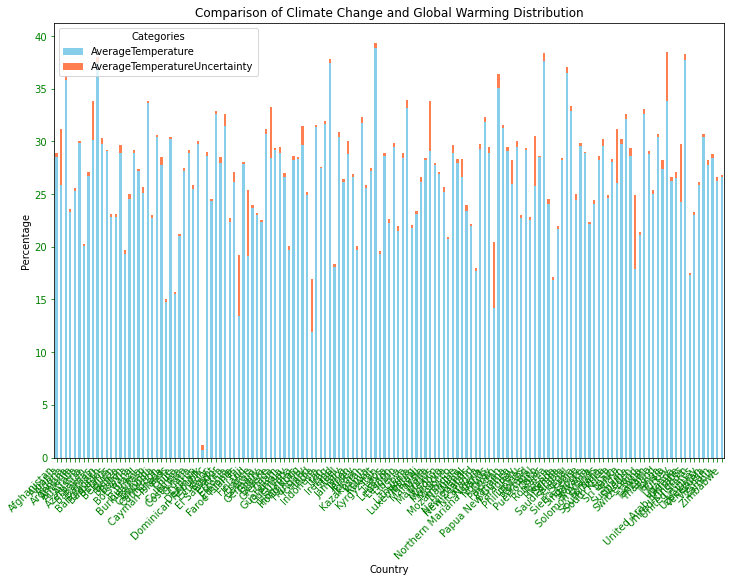

In [37]:

# Load the data into a DataFrame
df = pd.DataFrame(result_data)

# Plot a stacked bar chart
fig, ax = plt.subplots(figsize=(12, 8))

# Plotting Climate change and Global Warming side by side for each country
df.plot(kind='bar', x='Country', stacked=True, color=['skyblue', 'coral'], ax=ax)

# Adding labels and title
plt.xlabel('Country')
plt.ylabel('Percentage')
plt.title('Comparison of Climate Change and Global Warming Distribution')

# Customizing ticks color
plt.xticks(rotation=45, ha='right')
ax.tick_params(axis='x', colors='green')
ax.tick_params(axis='y', colors='green')

# Adding legend
plt.legend(title='Categories')

# Show plot
plt.show()


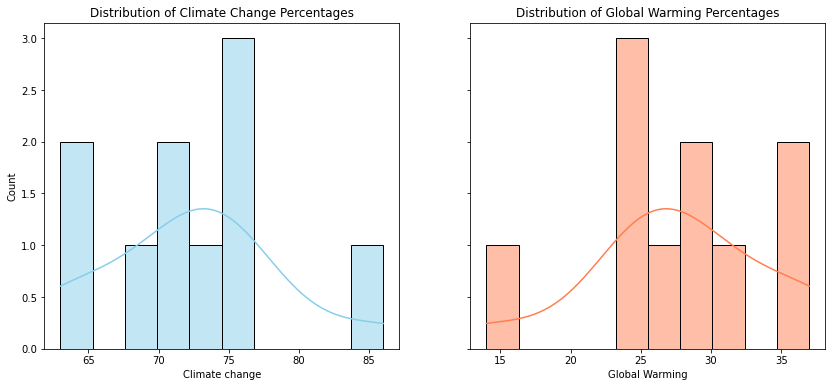

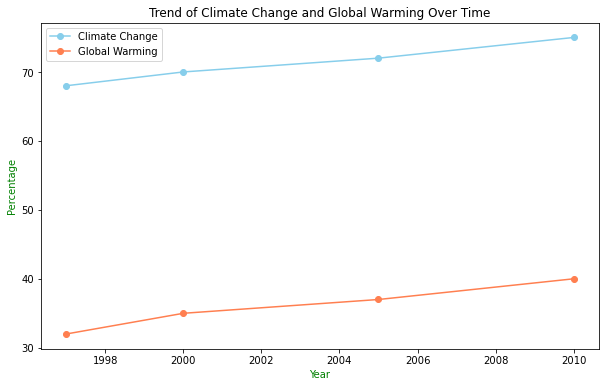

Correlation matrix:
                 Climate change  Global Warming
Climate change             1.0            -1.0
Global Warming            -1.0             1.0


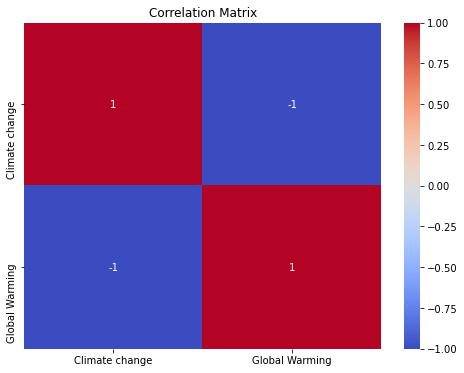

Comparative statistics:
        Climate change  Global Warming
count       10.000000       10.000000
mean        72.300000       27.700000
std          6.700746        6.700746
min         63.000000       14.000000
25%         69.000000       25.000000
50%         73.000000       27.000000
75%         75.000000       31.000000
max         86.000000       37.000000


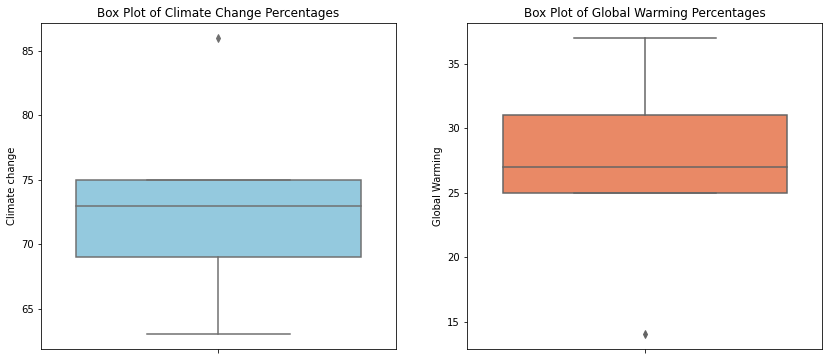

In [35]:


# Create the DataFrame from the given data
data = {
    "Country": ["Afghanistan", "Albania", "Algeria", "Argentina", "Armenia", "Uzbekistan", "Venezuela", "Vietnam", "Zambia", "Zimbabwe"],
    "Climate change": [68, 75, 86, 72, 75, 63, 75, 63, 74, 72],
    "Global Warming": [32, 25, 14, 28, 25, 37, 25, 37, 26, 28]
}

# Load the data into a DataFrame
df = pd.DataFrame(data)

# Distribution Analysis
fig, axes = plt.subplots(1, 2, figsize=(14, 6), sharey=True)
sns.histplot(df['Climate change'], bins=10, kde=True, ax=axes[0], color='skyblue')
axes[0].set_title('Distribution of Climate Change Percentages')
sns.histplot(df['Global Warming'], bins=10, kde=True, ax=axes[1], color='coral')
axes[1].set_title('Distribution of Global Warming Percentages')
plt.show()

# Assuming we have more data points for a trend analysis
data_trend = {
    "Country": ["Afghanistan", "Afghanistan", "Afghanistan", "Afghanistan"],
    "Year": [1997, 2000, 2005, 2010],
    "Climate change": [68, 70, 72, 75],
    "Global Warming": [32, 35, 37, 40],
    "AverageTemperature": [28.533, 28.800, 29.100, 29.500]
}

# Load the trend data into a DataFrame
df_trend = pd.DataFrame(data_trend)

# Plot trends
plt.figure(figsize=(10, 6))
plt.plot(df_trend['Year'], df_trend['Climate change'], marker='o', label='Climate Change', color='skyblue')
plt.plot(df_trend['Year'], df_trend['Global Warming'], marker='o', label='Global Warming', color='coral')
plt.xlabel('Year', color='green')
plt.ylabel('Percentage', color='green')
plt.title('Trend of Climate Change and Global Warming Over Time')
plt.legend()
plt.show()

# Correlation Analysis
correlation = df[['Climate change', 'Global Warming']].corr()
print("Correlation matrix:\n", correlation)

# Heatmap for correlation
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# Comparative Analysis
stats = df[['Climate change', 'Global Warming']].describe()
print("Comparative statistics:\n", stats)

# Box plots for comparison
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(y=df['Climate change'], ax=axes[0], color='skyblue')
axes[0].set_title('Box Plot of Climate Change Percentages')
sns.boxplot(y=df['Global Warming'], ax=axes[1], color='coral')
axes[1].set_title('Box Plot of Global Warming Percentages')
plt.show()


Result and Limitations

Describe the output data of your data pipeline
What is the data structure and quality of your result? (Compare lecture D01)
What data format did you choose as the output of your pipeline and why

This dataset isn't necessarily the best dataset to definitively find the difference between global warming and climate change. Here's why:

Limited Timeframe: The data covers a period from January 1st, 2004 to September 27th, 2021 (less than 18 years). Climate change is a long-term phenomenon measured in decades or even centuries. This dataset wouldn't capture the long-term trends needed to fully distinguish climate change from natural fluctuations in weather.

Missing Data: The dataset focuses on "Climate Change" and "Global Warming" values, but it doesn't provide any specific details on what those values represent (e.g., temperature change, policy implementations). Without that context, it's difficult to understand how they differ.

Limited Scope: The dataset seems to be focused on a single country, while climate change and global warming are global issues. A broader dataset encompassing multiple countries over a longer period would be more suitable.


By analyzing these elements, scientists can compare global temperature increases (global warming) with the resulting changes in weather patterns and ecosystems (climate change).